# Transformers

In [1]:
import os
import sys

os.chdir("..")
sys.path.append(os.getcwd())
os.getcwd()

'/group/pmc026/nchoong/QuantumTransformer'

In [2]:
from transformer.pytorch.main_no_embed import main
from transformer.pytorch.utils.plots import plot_metrics
from transformer.pytorch.utils.load_dataloader import load_dataloader

2024-10-03 18:34:52.098897: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-03 18:34:52.111324: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-03 18:34:52.126497: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-03 18:34:52.131179: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-03 18:34:52.142612: I tensorflow/core/platform/cpu_feature_guar

In [3]:
from config import dev

dev

device(type='cuda')

In [4]:
import random
import numpy as np
import torch
import tensorflow as tf

In [5]:
[torch.cuda.device(i) for i in range(torch.cuda.device_count())]

[<torch.cuda.device at 0x7fe422e30590>, <torch.cuda.device at 0x7fe48af3c150>]

In [6]:
seed = 42

os.environ["PYTHONHASHSEED"] = str(seed)
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

os.environ["OMP_NUM_THREADS"] = str(os.cpu_count())
os.environ["TF_NUM_INTEROP_THREADS"] = str(os.cpu_count())
os.environ["TF_NUM_INTRAOP_THREADS"] = str(os.cpu_count())

tf.config.threading.set_intra_op_parallelism_threads(os.cpu_count())
tf.config.threading.set_inter_op_parallelism_threads(os.cpu_count())

torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [7]:
train_dataloader, val_dataloader, test_dataloader = load_dataloader("imdb")

Loading train tensors: 100%|██████████| 7/7 [00:02<00:00,  2.37it/s]


Sample size:  5000


Loading test tensors: 100%|██████████| 9/9 [00:03<00:00,  2.52it/s]


Test size:  5000
Sampled train tensor shape:  torch.Size([20000, 128, 768])
Sampled val tensor shape:  torch.Size([5000, 128, 768])
Sampled test tensor shape:  torch.Size([5000, 128, 768])
Train, Val, Test size:  20000 5000 5000
pos:  10006
neg:  9994
pos:  2494
neg:  2506
pos:  2515
neg:  2485


## Classical

```
++ There will be 2 transformer blocks
TextClassifier(
  (squeeze): Linear(in_features=768, out_features=256, bias=True)
  (transformers): ModuleList(
    (0-1): 2 x Encoder(
      (attn): MultiHeadedAttention(
        (linears): ModuleList(
          (0-2): 3 x Linear(in_features=256, out_features=256, bias=False)
        )
        (combine_heads): Linear(in_features=256, out_features=256, bias=False)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (norm1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
      (dropout1): Dropout(p=0.1, inplace=False)
      (ffn): FeedForward(
        (linear_1): Linear(in_features=256, out_features=16, bias=True)
        (linear_2): Linear(in_features=16, out_features=256, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (norm2): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
      (dropout2): Dropout(p=0.1, inplace=False)
    )
  )
  (dropout): Dropout(p=0.1, inplace=False)
  (layer_norm): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
  (class_logits): Linear(in_features=256, out_features=1, bias=True)
)
Layer Name                               Number of Parameters
============================================================
squeeze.weight                           196608
squeeze.bias                             256
transformers.0.attn.linears.0.weight     65536
transformers.0.attn.linears.1.weight     65536
transformers.0.attn.linears.2.weight     65536
transformers.0.attn.combine_heads.weight 65536
transformers.0.norm1.weight              256
transformers.0.norm1.bias                256
transformers.0.ffn.linear_1.weight       4096
transformers.0.ffn.linear_1.bias         16
transformers.0.ffn.linear_2.weight       4096
transformers.0.ffn.linear_2.bias         256
transformers.0.norm2.weight              256
transformers.0.norm2.bias                256
transformers.1.attn.linears.0.weight     65536
transformers.1.attn.linears.1.weight     65536
transformers.1.attn.linears.2.weight     65536
transformers.1.attn.combine_heads.weight 65536
transformers.1.norm1.weight              256
transformers.1.norm1.bias                256
transformers.1.ffn.linear_1.weight       4096
transformers.1.ffn.linear_1.bias         16
transformers.1.ffn.linear_2.weight       4096
transformers.1.ffn.linear_2.bias         256
transformers.1.norm2.weight              256
transformers.1.norm2.bias                256
layer_norm.weight                        256
layer_norm.bias                          256
class_logits.weight                      256
class_logits.bias                        1
The model has 740,897 trainable parameters
Epoch   1/20: 100%|██████████| 313/313 [00:13<00:00, 22.87batch/s, Epoch = 0m 13s, Loss = 0.6601|0.6208, Acc = 0.616|0.724, AUC = 66.469|79.649]
Epoch   2/20: 100%|██████████| 313/313 [00:13<00:00, 23.83batch/s, Epoch = 0m 13s, Loss = 0.5518|0.5038, Acc = 0.752|0.784, AUC = 82.623|86.458]
Epoch   3/20: 100%|██████████| 313/313 [00:10<00:00, 29.73batch/s, Epoch = 0m 10s, Loss = 0.4546|0.4365, Acc = 0.795|0.804, AUC = 87.450|88.620]
Epoch   4/20: 100%|██████████| 313/313 [00:09<00:00, 32.95batch/s, Epoch = 0m 9s, Loss = 0.4178|0.4307, Acc = 0.812|0.800, AUC = 89.112|89.696]
Epoch   5/20: 100%|██████████| 313/313 [00:08<00:00, 36.32batch/s, Epoch = 0m 8s, Loss = 0.4013|0.3945, Acc = 0.821|0.823, AUC = 89.978|90.376]
Epoch   6/20: 100%|██████████| 313/313 [00:08<00:00, 36.78batch/s, Epoch = 0m 8s, Loss = 0.3877|0.3959, Acc = 0.830|0.816, AUC = 90.660|90.434]
Epoch   7/20: 100%|██████████| 313/313 [00:09<00:00, 31.55batch/s, Epoch = 0m 9s, Loss = 0.3858|0.3922, Acc = 0.829|0.825, AUC = 90.761|90.493]
Epoch   8/20: 100%|██████████| 313/313 [00:09<00:00, 32.14batch/s, Epoch = 0m 9s, Loss = 0.3839|0.3909, Acc = 0.831|0.824, AUC = 90.843|90.549]
Epoch   9/20: 100%|██████████| 313/313 [00:09<00:00, 33.74batch/s, Epoch = 0m 9s, Loss = 0.3838|0.3925, Acc = 0.830|0.817, AUC = 90.862|90.605]
Epoch  10/20: 100%|██████████| 313/313 [00:08<00:00, 36.69batch/s, Epoch = 0m 8s, Loss = 0.3820|0.3902, Acc = 0.831|0.825, AUC = 90.943|90.657]
Epoch  11/20: 100%|██████████| 313/313 [00:08<00:00, 37.20batch/s, Epoch = 0m 8s, Loss = 0.3815|0.3890, Acc = 0.832|0.824, AUC = 90.973|90.662]
Epoch  12/20: 100%|██████████| 313/313 [00:08<00:00, 38.41batch/s, Epoch = 0m 8s, Loss = 0.3811|0.3898, Acc = 0.832|0.822, AUC = 91.004|90.668]
Epoch  13/20: 100%|██████████| 313/313 [00:09<00:00, 33.21batch/s, Epoch = 0m 9s, Loss = 0.3815|0.3865, Acc = 0.832|0.825, AUC = 90.967|90.673]
Epoch  14/20: 100%|██████████| 313/313 [00:06<00:00, 46.75batch/s, Epoch = 0m 6s, Loss = 0.3806|0.3908, Acc = 0.831|0.822, AUC = 91.007|90.679]
Epoch  15/20: 100%|██████████| 313/313 [00:06<00:00, 45.75batch/s, Epoch = 0m 6s, Loss = 0.3804|0.3877, Acc = 0.832|0.826, AUC = 91.036|90.684]
Epoch  16/20: 100%|██████████| 313/313 [00:08<00:00, 38.26batch/s, Epoch = 0m 8s, Loss = 0.3809|0.3913, Acc = 0.833|0.823, AUC = 91.003|90.684]
Epoch  17/20: 100%|██████████| 313/313 [00:07<00:00, 39.35batch/s, Epoch = 0m 7s, Loss = 0.3813|0.3862, Acc = 0.832|0.826, AUC = 90.990|90.685]
Epoch  18/20: 100%|██████████| 313/313 [00:07<00:00, 40.70batch/s, Epoch = 0m 7s, Loss = 0.3804|0.3918, Acc = 0.834|0.823, AUC = 91.040|90.686]
Epoch  19/20: 100%|██████████| 313/313 [00:06<00:00, 49.89batch/s, Epoch = 0m 6s, Loss = 0.3810|0.3867, Acc = 0.832|0.825, AUC = 91.010|90.686]
Epoch  20/20: 100%|██████████| 313/313 [00:07<00:00, 41.85batch/s, Epoch = 0m 7s, Loss = 0.3801|0.3895, Acc = 0.834|0.823, AUC = 91.035|90.687]
TOTAL TIME = 179.21s
BEST ACC = 0.83% AT EPOCH 15
BEST AUC = 90.69 AT EPOCH 20
```

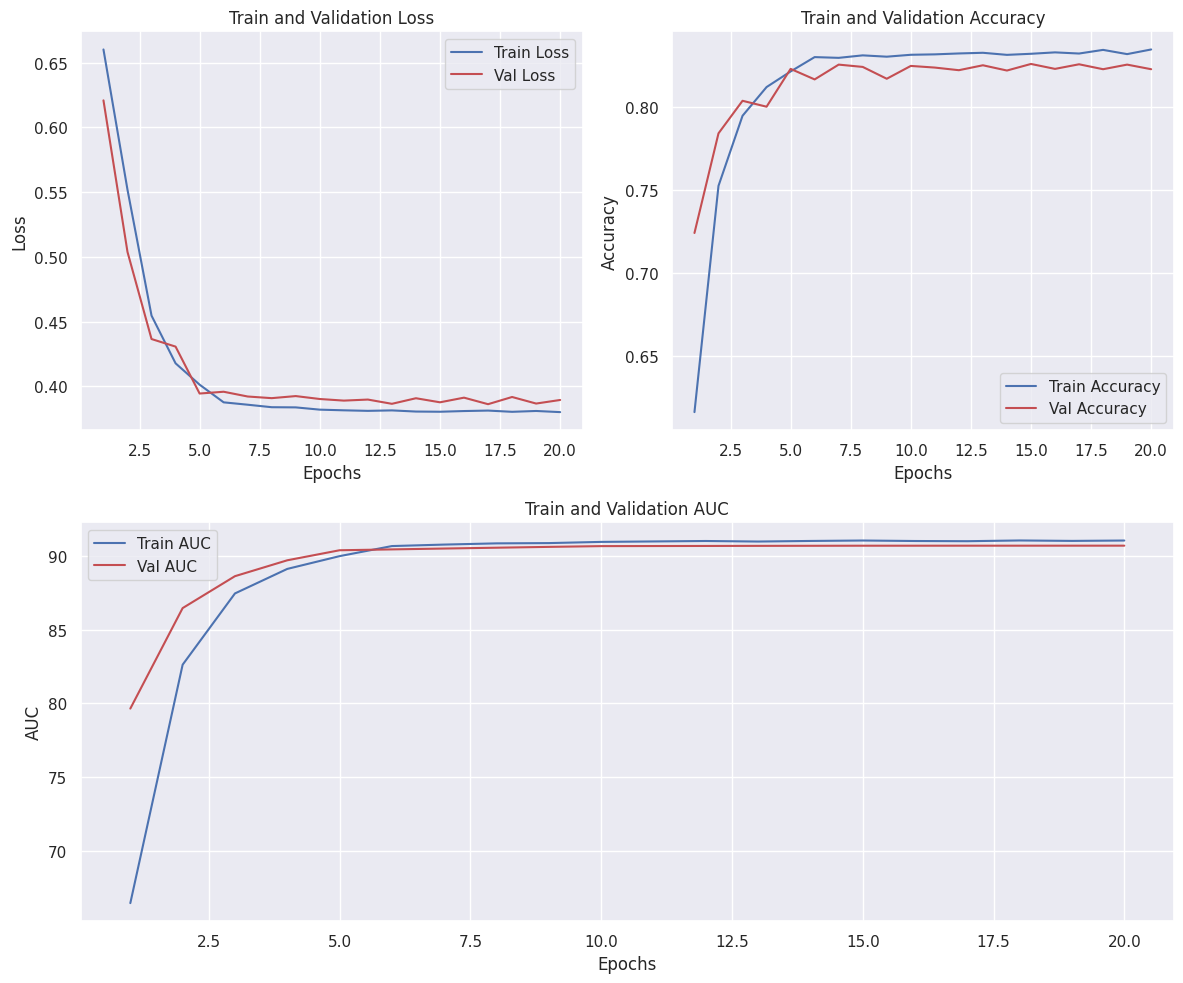


## Quantum with Pennylane GPU

In [8]:
train_loss, train_acc, val_loss, val_acc, train_auc, val_auc, best_dict = main(
    train_dataloader=train_dataloader,
    val_dataloader=val_dataloader,
    test_dataloader=test_dataloader,
    n_epochs=20,
    sample_size=0,
    batch_size=64,
    embed_dim=2**4,
    num_heads=2,
    num_blocks=2,
    n_qubits_transformer=4,
    n_qubits_ffn=4,
    n_qlayers=3,
    tqdm_disabled=False,
    q_device="default.qubit.torch",
    batch=True,
    circuit_type="pennylane",
    encoding_type="angle_amp",
    pennylane_args={
        "hadamard": False,
        "encoder": "amplitude",
        "angle_rot": "X",
        "entangler": "basic",
        "rot": "X",
        "imprimitive": "X",
    },
)

quantum_pl_gpu_metrics_batch = {
    "train_loss": train_loss,
    "train_acc": train_acc,
    "val_loss": val_loss,
    "val_acc": val_acc,
    "train_auc": train_auc,
    "val_auc": val_auc,
    "best_dict": best_dict,
}

++ There will be 2 transformer blocks
++ Transformer will use 4 qubits and 3 q layers
The feed-forward head will use 4 qubits
Using PennyLane quantum device default.qubit.torch
weight_shapes = (n_qlayers, n_qubits) = (3, 4)
weight_shapes = (n_qlayers, n_qubits) = (3, 4)
TextClassifier(
  (squeeze): Linear(in_features=768, out_features=16, bias=True)
  (transformers): ModuleList(
    (0-1): 2 x Encoder(
      (attn): MultiHeadedAttention(
        (k_linear): QuantumLayer(
          (linear): <Quantum Torch Layer: func=qlayer>
        )
        (q_linear): QuantumLayer(
          (linear): <Quantum Torch Layer: func=qlayer>
        )
        (v_linear): QuantumLayer(
          (linear): <Quantum Torch Layer: func=qlayer>
        )
        (combine_heads): QuantumLayer(
          (linear): <Quantum Torch Layer: func=qlayer>
        )
        (dropout): Dropout(p=0.1, inplace=False)
        (unsqueeze1): Linear(in_features=4, out_features=16, bias=True)
        (unsqueeze2): Linear(in_feat

/group/pmc026/nchoong/qt/lib/python3.11/site-packages/pennylane/devices/default_qubit_torch.py:173: PennyLaneDeprecationWarning: Use of 'default.qubit.torch' is deprecated. Instead, use 'default.qubit', which supports backpropagation. If you experience issues, reach out to the PennyLane team on the discussion forum: https://discuss.pennylane.ai/
  warnings.warn(
/group/pmc026/nchoong/qt/lib/python3.11/site-packages/pennylane/devices/default_qubit_legacy.py:211: PennyLaneDeprecationWarning: Use of 'default.qubit.torch' is deprecated. Instead, use 'default.qubit', which supports backpropagation. If you experience issues, reach out to the PennyLane team on the discussion forum: https://discuss.pennylane.ai/
  warnings.warn(


Epoch   1/20:   0%|          | 0/313 [00:00<?, ?batch/s]

In [ ]:
plot_metrics(train_loss, val_loss, train_acc, val_acc, train_auc, val_auc)

In [ ]:
# train_loss, train_acc, val_loss, val_acc, train_auc, val_auc, best_dict = main(
#     train_dataloader=train_dataloader,
#     val_dataloader=val_dataloader,
#     test_dataloader=test_dataloader,
#     n_epochs=20,
#     sample_size=0,
#     batch_size=64,
#     embed_dim=256,
#     num_heads=2,
#     num_blocks=2,
#     n_qubits_transformer=8,
#     n_qubits_ffn=8,
#     n_qlayers=3,
#     tqdm_disabled=False,
#     q_device="default.qubit.torch",
#     batch=True,
#     circuit_type="pennylane",
#     encoding_type="block",
#     pennylane_args={
#         "hadamard": False,
#         "encoder": "angle",
#         "angle_rot": "X",
#         "entangler": "strong",
#         "rot": "X",
#         "imprimitive": "X",
#     },
# )

# quantum_pl_gpu_metrics_batch = {
#     "train_loss": train_loss,
#     "train_acc": train_acc,
#     "val_loss": val_loss,
#     "val_acc": val_acc,
#     "train_auc": train_auc,
#     "val_auc": val_auc,
#     "best_dict": best_dict,
# }

In [ ]:
# plot_metrics(train_loss, val_loss, train_acc, val_acc, train_auc, val_auc)